# Understand Model Behavior During Training By Plotting History

You can learn a lot about neural networks and deep learning models by observing their performance over time during training. In this lesson, you will discover how you can review and visualize deep learning models' performance during training in Python with Keras. After completing this lesson, you will know:

* How to inspect the history metrics collected during training.
* How to plot accuracy metrics on training and validation datasets during training.
* How to plot model loss metrics on training and validation datasets during training.

Let's get started.

## Access Model Training History in Keras

Keras provides the capability to register callbacks when training a deep learning model. One of the default callbacks that is registered when training all deep learning models is the `History` callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) and the loss and accuracy for the validation dataset if one is set.

The history object is returned from calls to the `fit()` function used to train the model. Metrics are stored in a dictionary in the `history` member of the object returned. For example, you can list the metrics collected in a history object using the following snippet of code after a model is trained:

```python
# list all data in history
print(history.history.keys())
```

For example, for a model trained on a classification problem with a validation dataset, this might produce the following listing:

`['loss', 'accuracy', 'val_loss', 'val_accuracy']`

We can use the data collected in the history object to create plots. The plots can provide an indication of useful things about the training of the model, such as:

* Its speed of convergence over epochs (slope).
* Whether the model may have already converged (plateau of the line).
* Whether the model may be over-learning the training data (infection for validation line).

And more.

## Visualize Model Training History in Keras

We can create plots from the collected history data. In the example below, we create a small network to model the Pima Indians onset of diabetes binary classification problem. The example collects the history returned from training the model and creates two charts:

1. A plot of accuracy on the training and validation datasets over training epochs.
2. A plot of loss on the training and validation datasets over training epochs.

In [1]:
import tensorflow as tf

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(7)

# load pima indians dataset
dataset = numpy.loadtxt("../../datasets/pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


The plots are provided below. The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model. From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

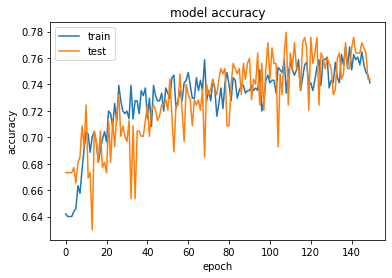

In [2]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

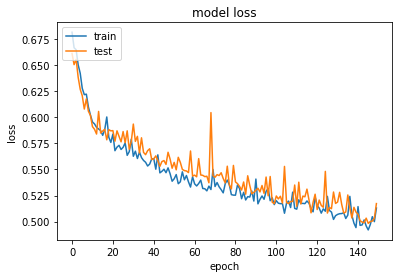

In [3]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summary

In this lesson, you discovered the importance of collecting and reviewing metrics during your deep learning models' training. You learned:

* How to inspect a history object returned from training to discover the metrics that were collected.
* How to extract model accuracy information for training and validation datasets and plot the data.
* How to extract and plot the model loss information calculated from training and validation datasets.

### Next

A simple yet very powerful technique for decreasing your model's overfitting to training data is called dropout. In the next lesson, you will discover the dropout technique, how to apply it to visible and hidden layers in Keras, and best practices for using it on your own problems.